# Projeto 2 - Ciência dos Dados
#     Urbanização e Telefone Celulares pelo Mundo    
### Lucas Matheus Borges

Para a realização desse projeto tomei como dataset duas planilhas diferentes. A primeira trata a respeito da urbanização (em porcentagem) de diversos países pelo mundo. Já a segunda, trata-se de uma planilha com a quantidade de celulares a cada cem pessoas em vários países.



Mobile cellular subscriptions (per 100 people) = http://data.worldbank.org/indicator/IT.CEL.SETS.P2                     
Urban population (% of total) = http://data.worldbank.org/indicator/SP.URB.TOTL.IN.ZS

In [3]:
%matplotlib inline
import os
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np


from scipy import stats
#from scipy.stats import lognorm


print('Esperamos trabalhar no diretório')
print(os.getcwd())

Esperamos trabalhar no diretório
C:\Users\Lucas Borges\Desktop\Ciência dos dados\Projeto 2


# Inspeção Visual das variáveis

**Urbanização**

[0, 150, 0, 0.02]

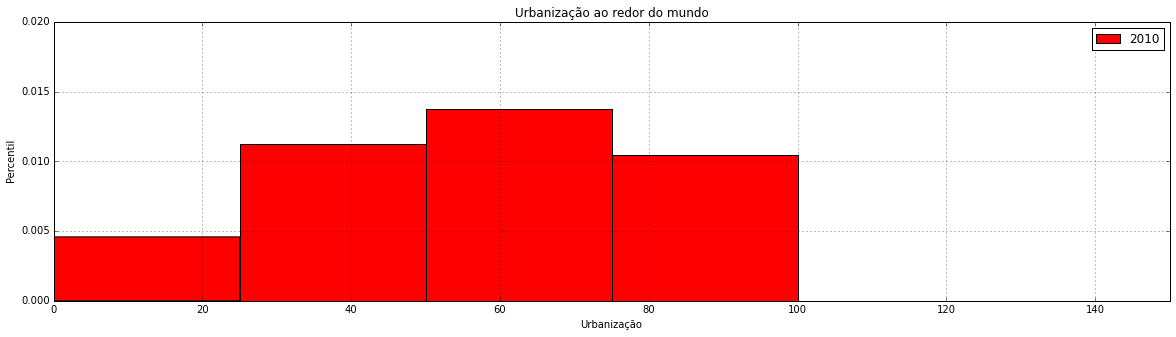

In [4]:
Urbanizacao = pd.read_excel('Urbanização.xls') # Lê a dataset
U1=Urbanizacao['2010'] # Vai ler somente a coluna 2010
fig,ax = plt.subplots(figsize=(20,5)) # Aumenta o tamanho do gráfico (lembrar de colocar ax no DataFrame-Somente nele)
pd.DataFrame.plot(kind='hist',data=U1, bins=(range(0,151,25)),normed=True,color='red',grid=2,legend=True,title="Urbanização ao redor do mundo",ax=ax) # Plotagem do histograma
plt.ylabel('Percentil') # Legenda no eixo Y
plt.xlabel('Urbanização') # Legenda no eixo X
plt.axis([0,150,0,0.02])

**Telefone Celulares**

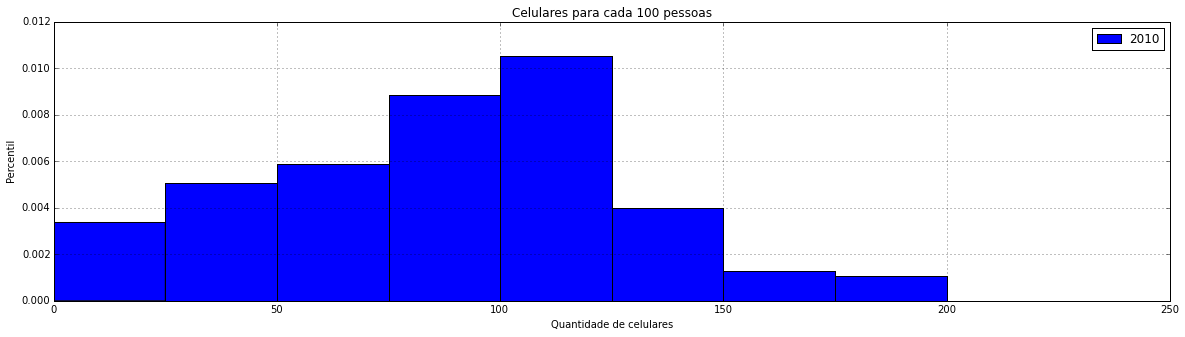

In [5]:
Celular = pd.read_excel('Celular.xls') # Lê a dataset
C1=Celular['2010'] # Vai ler somente a coluna 2010
fig,ax = plt.subplots(figsize=(20,5)) # Aumenta o tamanho do gráfico (lembrar de colocar ax no DataFrame-Somente nele)
pd.DataFrame.plot(kind='hist',data=C1, bins=(range(0,251,25)),normed=True,grid=2,legend=True,title="Celulares para cada 100 pessoas",ax=ax) # Plotagem do histograma
plt.ylabel('Percentil') # Legenda no eixo Y
plt.xlabel('Quantidade de celulares') # Legenda no eixo X

Analisando os dois histogramas gerados pode concluir-se que ambas se aproximam de uma distribuição log-normal. Além disso, tanto a distribuição beta como a gamma podem ser usadas como uma aproximação para as variáveis analisadas.

# Análise do histrograma vs. o plot teórico da distribuição

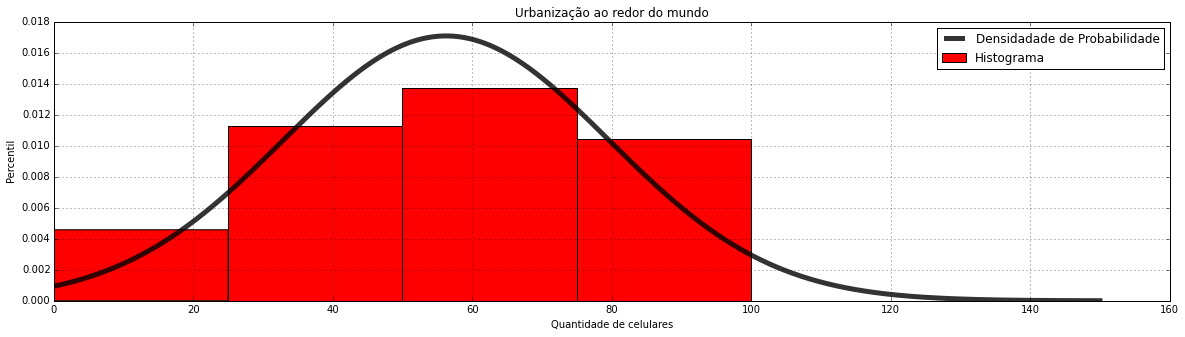

In [6]:
stddev = U1.std() # Desvio Padrão
mean = U1.mean() # Média

fra = [] # frequencia relativa acumulada
for i in range(len(U1)):
  fra.append(((i+1) - 0.5) / len(U1))

x=np.linspace(0,150,1001) # Valor inicial, Valor Final, Número de elementos

fig,ax = plt.subplots(figsize=(20,5)) # Aumenta o tamanho do gráfico (lembrar de colocar ax no DataFrame-Somente nele)

pd.DataFrame.plot(kind='hist',data=U1,color='red', bins=(range(0,150,25)),normed=True,grid=2,legend=True,title="Urbanização ao redor do mundo", ax=ax) # Plotagem do histograma
plt.plot(x, stats.norm.pdf(x,loc=mean,scale=stddev),'black',alpha=0.8,lw=5) # Plota a densidade de probabilidade de distribuição 
years = ["Densidadade de Probabilidade", 'Histograma'] # Lista com as legendas
plt.legend(years,loc='best') # loc='best' ajeita de melhor maneira a caixa de legendas
plt.ylabel('Percentil') # Legenda no eixo Y
plt.xlabel('Quantidade de celulares') # Legenda no eixo X
#plt.plot(range(0,len(U1)), fra, '-', color='black', label="F.R.A dos dados")



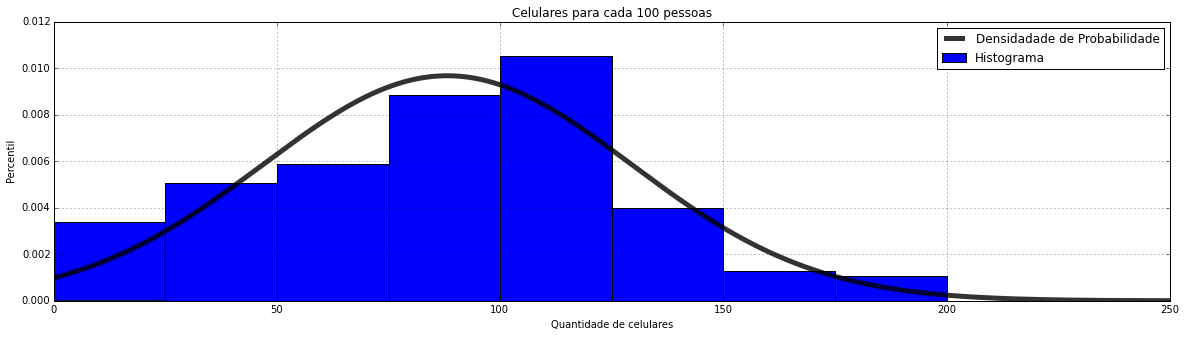

In [7]:
stddev = Celular['2010'].std() # Desvio Padrão
mean = Celular['2010'].mean() # Média

x=np.linspace(0,250,1000) # Valor inicial, Valor Final, Número de elementos

fig,ax = plt.subplots(figsize=(20,5)) # Aumenta o tamanho do gráfico (lembrar de colocar ax no DataFrame-Somente nele)

pd.DataFrame.plot(kind='hist',data=C1, bins=(range(0,250,25)),normed=True,grid=2,legend=True,title="Celulares para cada 100 pessoas", ax=ax) # Plotagem do histograma
plt.plot(x, stats.norm.pdf(x,loc=mean,scale=stddev),'black',alpha=0.8,lw=5) # Plota a densidade de probabilidade de distribuição 
years = ["Densidadade de Probabilidade", 'Histograma'] # Lista com as legendas
plt.legend(years,loc='best') # loc='best' ajeita de melhor maneira a caixa de legendas
plt.ylabel('Percentil') # Legenda no eixo Y
plt.xlabel('Quantidade de celulares') # Legenda no eixo X



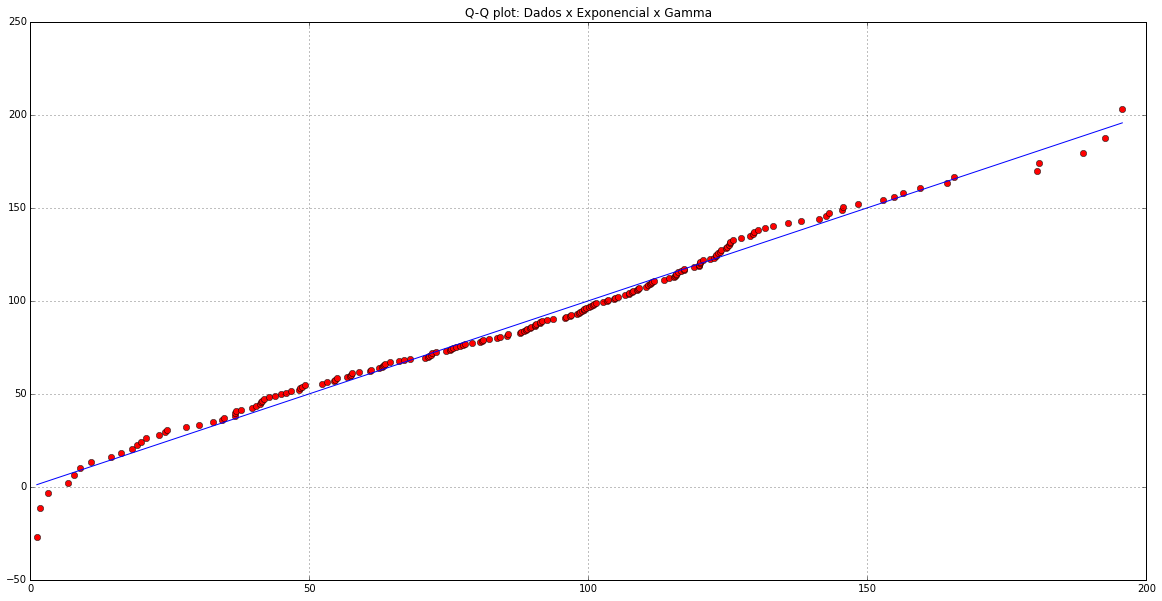

In [8]:
# dados ordenados e quantis teóricos - QQplot

stddev = Celular['2010'].std() # Desvio Padrão
mean = Celular['2010'].mean() # Média]

C1= Celular['2010'].sort(inplace=False)
#C1=Celular['2010']

# Calcula a frequência relativa acumulada com os dados vindos dos arquivos
fra = [] # frequencia relativa acumulada
for i in range(len(C1)):
    acc = (i + 0.5) / len(C1)
    fra.append(acc) # ver Magalhães e Lima (pag. 195)

# Gera os valores dos quantis teóricos para as distribuições analisadas

q_norm = stats.norm.ppf(fra,loc=mean,scale=stddev)


fig = plt.figure(figsize=(20,10))

plt.title("Q-Q plot: Dados x Exponencial x Gamma")

norm_plot, = plt.plot(C1, q_norm, 'o', color="red", label="Normal")

plt.plot((min(C1), max(C1)), (min(C1), max(C1)), '-')
plt.grid()


#for i in range(len(C)):
 #   plt.plot((C[i], C[i]), (q_norm[i], C[i]), '-', color='red', alpha=0.3  )
    



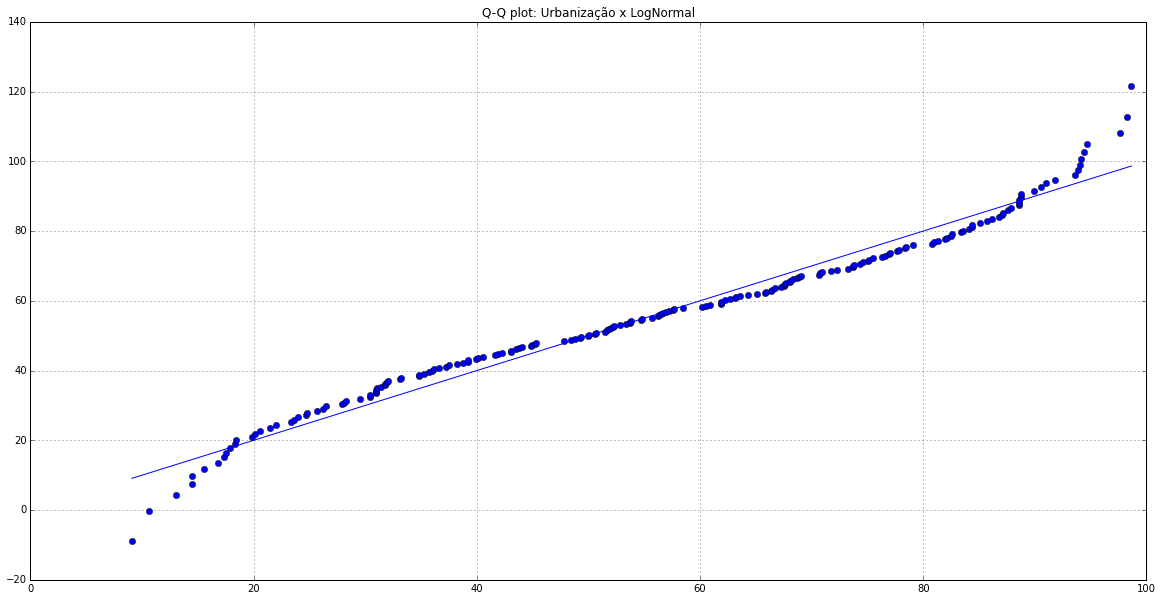

In [9]:
# dados ordenados e quantis teóricos - QQplot

stddev = Urbanizacao['2010'].std() # Desvio Padrão
mean = Urbanizacao['2010'].mean() # Média]

U1= Urbanizacao['2010'].sort(inplace=False)
#C1=Celular['2010']

# Calcula a frequência relativa acumulada com os dados vindos dos arquivos
fra = [] # frequencia relativa acumulada
for i in range(len(U1)):
    acc = (i + 0.5) / len(U1)
    fra.append(acc) # ver Magalhães e Lima (pag. 195)

# Gera os valores dos quantis teóricos para as distribuições analisadas

q_norm = stats.norm.ppf(fra,loc=mean,scale=stddev)


fig = plt.figure(figsize=(20,10))

plt.title("Q-Q plot: Urbanização x LogNormal")

norm_plot, = plt.plot(U1, q_norm, 'o', color="blue", label="Normal")

plt.plot((min(U1), max(U1)), (min(U1), max(U1)), '-')
plt.grid()


#for i in range(len(U1)):
  #  plt.plot((U1[i], U1[i]), (q_norm[i], U1[i]), '-', color='red', alpha=0.3  )
    
    

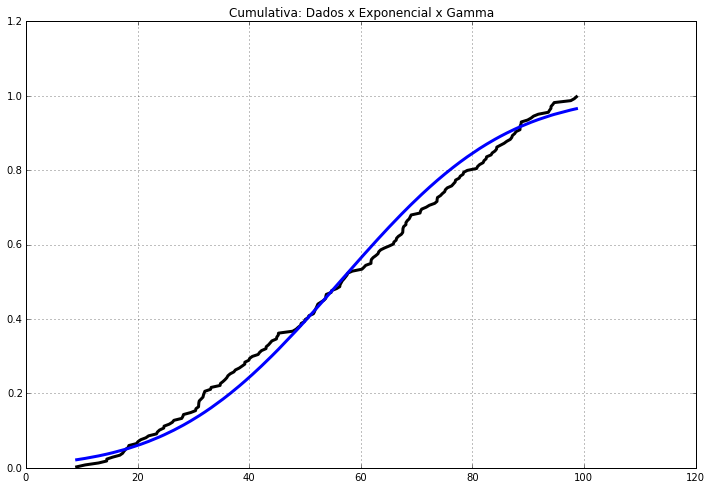

In [10]:
# fra e FDA

cdf_norm = stats.norm.cdf(U1,loc=mean,scale=stddev)
#cdf_gamma = stats.gamma.cdf(tempos, scale=theta_gamma, loc=0, a=k_gamma)

fig = plt.figure(figsize=(12,8))
plt.axis([0,120,0,1.2])

plt.title("Cumulativa: Dados x Exponencial x Gamma")

dados_fra_plot, = plt.plot(U1, fra, '-', color='black', label="F.R.A dos dados", lw=3)
cdf_norm,   = plt.plot(U1, cdf_norm, '-', color='blue', label = "Cumulativa da exponencial",lw=3)
#cdf_gamma_plot, = plt.plot(tempos, cdf_gamma, '-', color='green', label = "Cumulativa da distribuição Gamma")

#plt.legend(handles=[dados_fra_plot, cdf_exp_plot, cdf_gamma_plot])


#for i in range(len(tempos)):
  #  plt.plot((tempos[i], tempos[i]), (fra[i], cdf_exponencial[i]), ':', color="red", alpha=0.3)
    #Omitido para não poluir muito o gráfico
#plt.plot((tempos[i], tempos[i]), (fra[i], cdf_gamma[i]), '--', color="green", alpha=0.3)
plt.grid()    

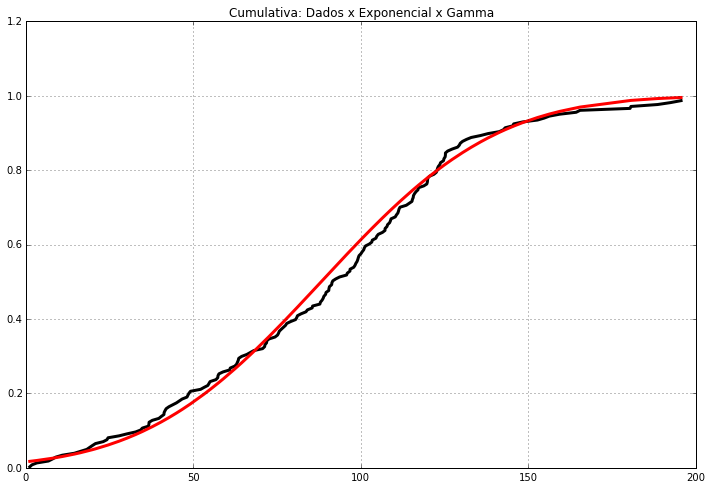

In [11]:
# fra e FDA

stddev = Celular['2010'].std() # Desvio Padrão
mean = Celular['2010'].mean() # Média]

fra = [] # frequencia relativa acumulada
for i in range(len(C1)):
    acc = (i + 0.5) / len(U1)
    fra.append(acc) # ver Magalhães e Lima (pag. 195)

cdf_norm = stats.norm.cdf(C1,loc=mean,scale=stddev)
#cdf_gamma = stats.gamma.cdf(tempos, scale=theta_gamma, loc=0, a=k_gamma)

fig = plt.figure(figsize=(12,8))
plt.axis([0,200,0,1.2])

plt.title("Cumulativa: Dados x Exponencial x Gamma")

dados_fra_plot, = plt.plot(C1, fra, '-', color='black', label="F.R.A dos dados", lw=3)
cdf_norm,   = plt.plot(C1, cdf_norm, '-', color='red', label = "Cumulativa da exponencial",lw=3)
#cdf_gamma_plot, = plt.plot(tempos, cdf_gamma, '-', color='green', label = "Cumulativa da distribuição Gamma")

#plt.legend(handles=[dados_fra_plot, cdf_exp_plot, cdf_gamma_plot])


#for i in range(len(C1+1)):
   # plt.plot((C1[i], C1[i]), (fra[i], cdf_norm[i]), ':', color="red", alpha=0.3)
    #Omitido para não poluir muito o gráfico
    #plt.plot((tempos[i], tempos[i]), (fra[i], cdf_gamma[i]), '--', color="green", alpha=0.3)
plt.grid()   